# Digital Twin Experiment 👯‍♀️🔋

In [1]:
#%pip install pybamm -q
import pybamm
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import liionpack as lp
import random
# import the os module
import os

# detect the current working directory and print it
print(os.chdir(pybamm.__path__[0]+ '/..'))
cwd = os.getcwd()

None


## Parameter Setting - PyBaMM

In [2]:
# finding default set
parameter_values = pybamm.ParameterValues("Chen2020")

In [3]:
# list over all parameters & values from given dataset
parameter_values.search('sei')

Initial inner SEI thickness [m]	2.5e-09
Initial outer SEI thickness [m]	2.5e-09
Inner SEI electron conductivity [S.m-1]	8.95e-14
Inner SEI lithium interstitial diffusivity [m2.s-1]	1e-20
Inner SEI open-circuit potential [V]	0.1
Inner SEI partial molar volume [m3.mol-1]	9.585e-05
Inner SEI reaction proportion	0.5
Outer SEI open-circuit potential [V]	0.8
Outer SEI partial molar volume [m3.mol-1]	9.585e-05
Outer SEI solvent diffusivity [m2.s-1]	2.5000000000000002e-22
Ratio of inner and outer SEI exchange current densities	1.0
SEI kinetic rate constant [m.s-1]	1e-12
SEI open-circuit potential [V]	0.4
SEI reaction exchange current density [A.m-2]	1.5e-07
SEI resistivity [Ohm.m]	200000.0


In [4]:
chemistry = pybamm.parameter_sets.Chen2020
chemistry

{'chemistry': 'lithium_ion',
 'cell': 'LGM50_Chen2020',
 'negative electrode': 'graphite_Chen2020',
 'separator': 'separator_Chen2020',
 'positive electrode': 'nmc_Chen2020',
 'electrolyte': 'lipf6_Nyman2008',
 'experiment': '1C_discharge_from_full_Chen2020',
 'sei': 'example',
 'citation': 'Chen2020'}

In [5]:
#change individual parameters
parameter_values['Current function [A]'] = 10
parameter_values['Current function [A]']

10

In [6]:
parameter_values = pybamm.ParameterValues(chemistry = chemistry)

* I have a problem using bash commands (Syntax Error) when trying to define personalized csv-file as can be done following this tutuorial: <br> (00:00-10:00) https://www.youtube.com/watch?v=oUhOL8ebOFw&t=426s&ab_channel=PyBaMM
* Sent email to creator of youtube tutotrial for PyBaMM to address syntax error

## Battery Pack Experimenting

In [7]:
I_init = 5.0 # initial current
V_init = 4.0  # initial voltage
Ri_init = 5e-2  # internal resistance
R_busbar = 1.5e-3 # busbar resistance
R_connection = 1e-2 # connection resistance
R_terminal = 1e-05 # terminal resistance 
Np = 2 # number of batteries in series
Ns = 16 # number of batteries in parallell
Nbatt = Np * Ns # total number of batteries
netlist = lp.setup_circuit(Np=Np, Ns=Ns, Ri=Ri_init, Rc= R_connection, 
                        Rb=R_busbar, Rt=R_terminal, I=I_init, V=V_init, plot=False, terminals='left')

In [8]:
netlist.head()

,desc,node1,node2,value,node1_x,node1_y,node2_x,node2_y
0,Rbn0,1,2,0.0015,0,0,1,0
1,Rc0,3,1,0.0100,0,1,0,0
2,V0,5,3,4.0000,0,2,0,1
3,Ri0,7,5,0.0500,0,3,0,2
4,Rc1,9,7,0.0100,0,4,0,3


In [9]:
experiment = pybamm.Experiment(
    [
        "Charge at 5 A for 30 minutes",
        "Rest for 15 minutes",
        "Discharge at 5 A for 30 minutes",
        "Rest for 15 minutes",
    ],
    period="10 seconds",
)

In [10]:
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)
SPMe = pybamm.models.full_battery_models.lithium_ion.SPM()
parameter_values.search('SEI')

Initial inner SEI thickness [m]	2.5e-09
Initial outer SEI thickness [m]	2.5e-09
Inner SEI electron conductivity [S.m-1]	8.95e-14
Inner SEI lithium interstitial diffusivity [m2.s-1]	1e-20
Inner SEI open-circuit potential [V]	0.1
Inner SEI partial molar volume [m3.mol-1]	9.585e-05
Inner SEI reaction proportion	0.5
Outer SEI open-circuit potential [V]	0.8
Outer SEI partial molar volume [m3.mol-1]	9.585e-05
Outer SEI solvent diffusivity [m2.s-1]	2.5000000000000002e-22
Ratio of inner and outer SEI exchange current densities	1.0
SEI kinetic rate constant [m.s-1]	1e-12
SEI open-circuit potential [V]	0.4
SEI reaction exchange current density [A.m-2]	1.5e-07
SEI resistivity [Ohm.m]	200000.0


In [11]:
output_variables = [
    "X-averaged negative particle surface concentration [mol.m-3]",
    "X-averaged positive particle surface concentration [mol.m-3]",
]

output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    output_variables=output_variables,
    initial_soc=0.5
)

Stepping simulation: 100%|██████████| 541/541 [00:05<00:00, 98.68it/s] 


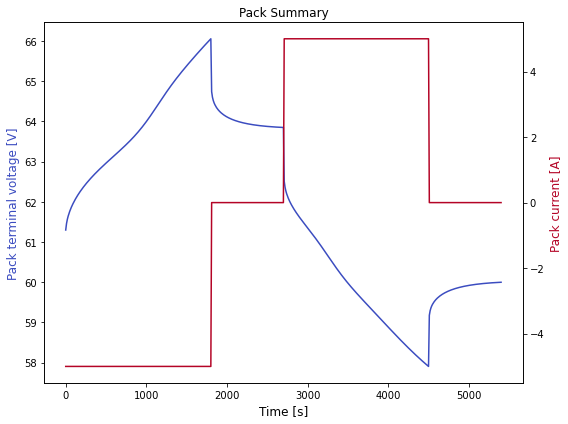

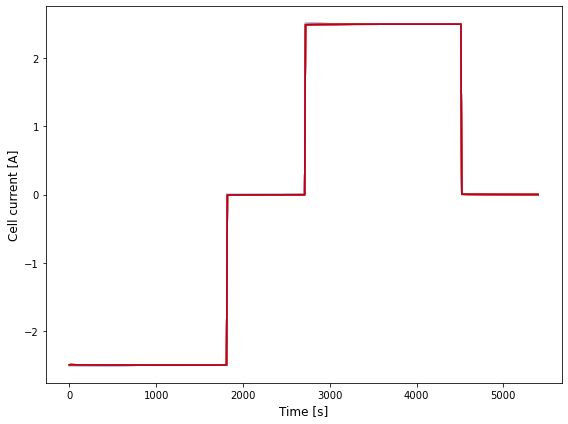

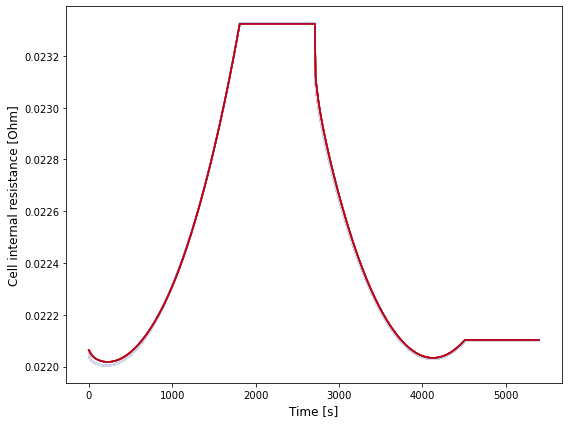

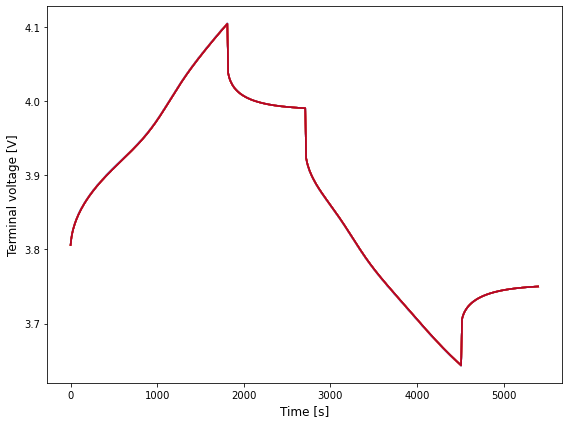

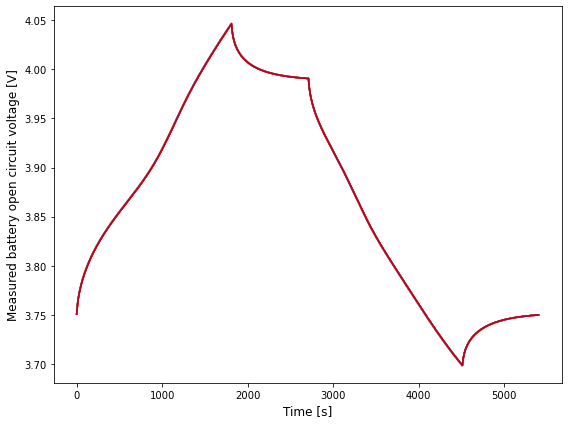

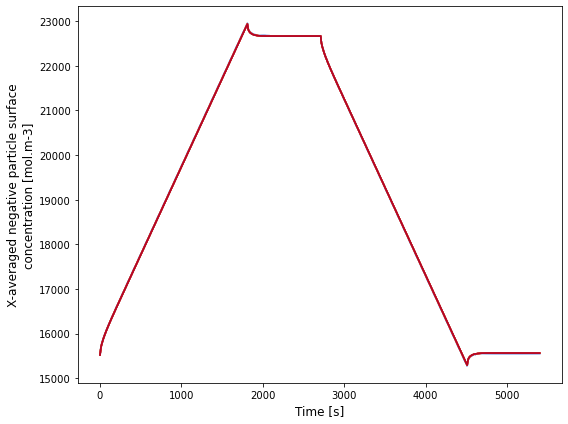

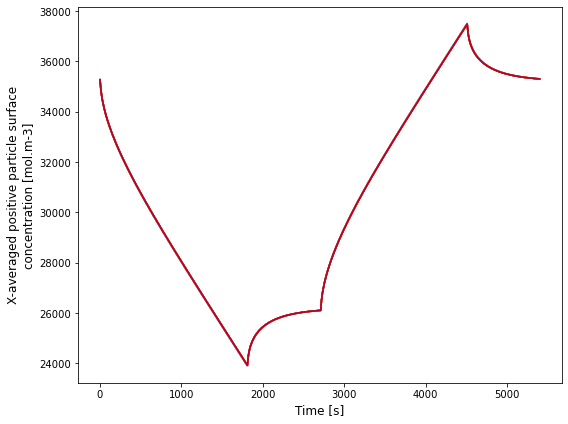

In [12]:
lp.plot_output(output)

### Parameters

In [13]:
parameter_values.search(" ")

1 + dlnf/dlnc	1.0
Ambient temperature [K]	298.15
Bulk solvent concentration [mol.m-3]	2636.0
Cation transference number	0.2594
Cell cooling surface area [m2]	0.00531
Cell volume [m3]	2.42e-05
Current function [A]	Current function [A]
EC diffusivity [m2.s-1]	2e-18
EC initial concentration in electrolyte [mol.m-3]	4541.0
Electrode height [m]	0.065
Electrode width [m]	1.58
Electrolyte conductivity [S.m-1]	<function electrolyte_conductivity_Nyman2008 at 0x7fa509ca6430>
Electrolyte diffusivity [m2.s-1]	<function electrolyte_diffusivity_Nyman2008 at 0x7fa509ca63a0>
Initial concentration in electrolyte [mol.m-3]	1000.0
Initial concentration in negative electrode [mol.m-3]	15522.138249037967
Initial concentration in positive electrode [mol.m-3]	35269.54644322063
Initial inner SEI thickness [m]	2.5e-09
Initial outer SEI thickness [m]	2.5e-09
Initial temperature [K]	298.15
Inner SEI electron conductivity [S.m-1]	8.95e-14
Inner SEI lithium interstitial diffusivity [m2.s-1]	1e-20
Inner SEI open-ci

* To change parameter input, it functions the same way as with PyBaMM. 


```
(E.g., this is how we would change the negative particle radius)
```

In [14]:
parameter_values["Negative particle radius [m]"]

5.86e-06

In [15]:
parameter_values.update({"Negative particle radius [m]": "6e-06"})

In [16]:
parameter_values["Negative particle radius [m]"]

6e-06

Stepping simulation: 100%|██████████| 541/541 [00:05<00:00, 96.73it/s] 


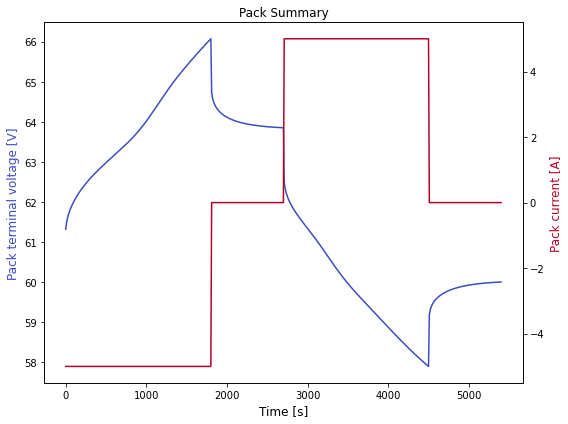

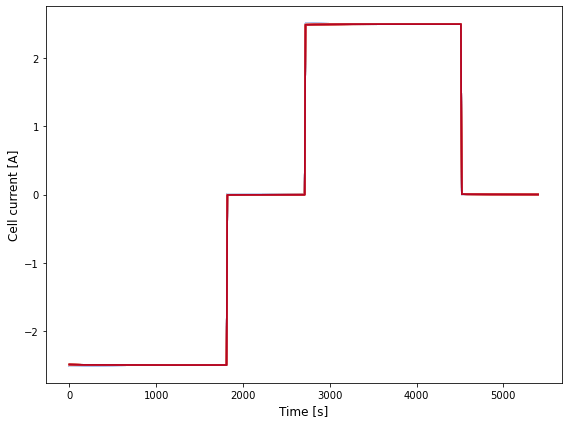

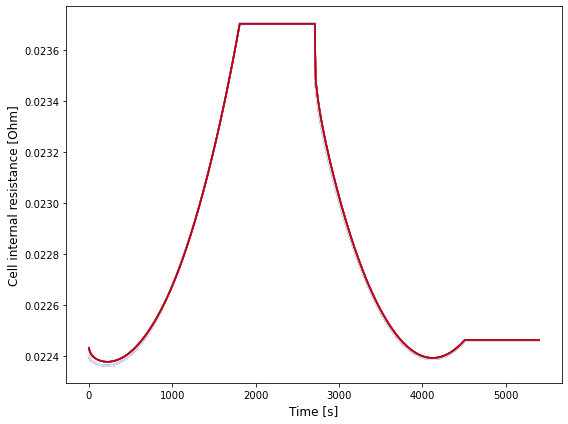

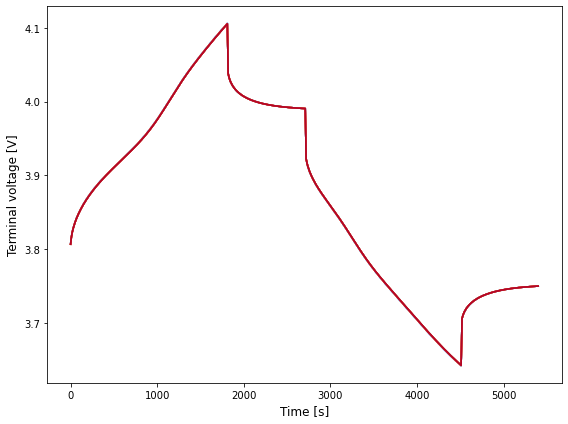

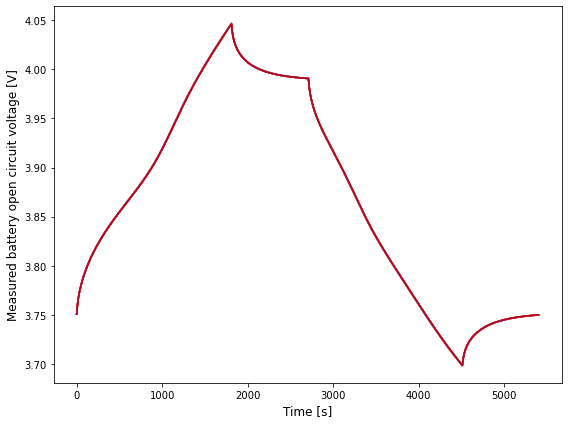

In [17]:
# changing it for every battery

parameter_values.update({"Negative particle radius [m]": "[input]"})
NP_radi = np.array([1.0 for i in range(Np*Ns)]) * 6e-06
inputs = {"Negative particle radius [m]" : NP_radi}

output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    inputs = inputs
)
lp.plot_output(output)

## Simulating an Experiment

In [18]:
output_variables = [
    "X-averaged negative particle surface concentration [mol.m-3]",
    "X-averaged positive particle surface concentration [mol.m-3]",
]

# PyBaMM parameters
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)

In [19]:
# Cycling experiment
# NOTE! For an experiment, the current must be specified in A, and the time
# per step must be an integer multiple of the period

experiment = pybamm.Experiment(
    [
        (
            "Discharge at 5 A for 1000 s or until 3.3 V",
            "Rest for 1000 s",
            "Charge at 5 A for 1000 s or until 4.1 V",
            "Rest for 1000 s",
        )
    ]
    * 3,
    period="10 s",
)

In [20]:
experiment.operating_conditions

[{'electric': (5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (-5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (-5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (-5.0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None},
 {'electric': (0, 'A'), 'time': 1000.0, 'period': 10.0, 'dc_data': None}]

In [21]:
# Solve pack
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    output_variables=output_variables,
    initial_soc=0.8
)

Stepping simulation: 100%|██████████| 1201/1201 [00:12<00:00, 97.38it/s] 


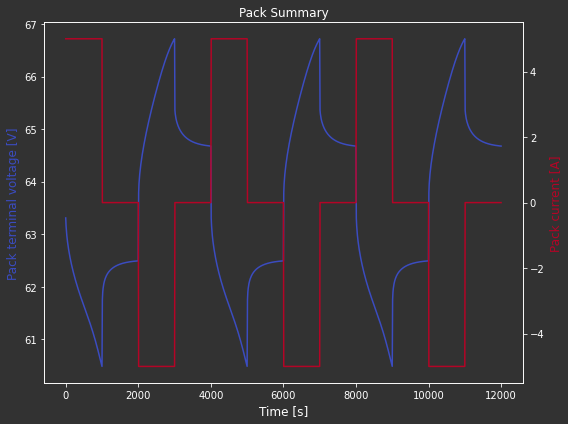

In [22]:
lp.plot_pack(output)


## Compare Simulation of Battery & Pack

In [23]:
# Setting State of Charge
SoC = 0.2
# Solve pack
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    initial_soc=SoC,
)

# Solve battery cell
sim = pybamm.Simulation(
    model=pybamm.lithium_ion.SPM(),
    experiment=experiment,
    parameter_values=parameter_values,
)
sol = sim.solve(initial_soc=SoC)

Stepping simulation: 100%|██████████| 1201/1201 [00:12<00:00, 99.61it/s] 


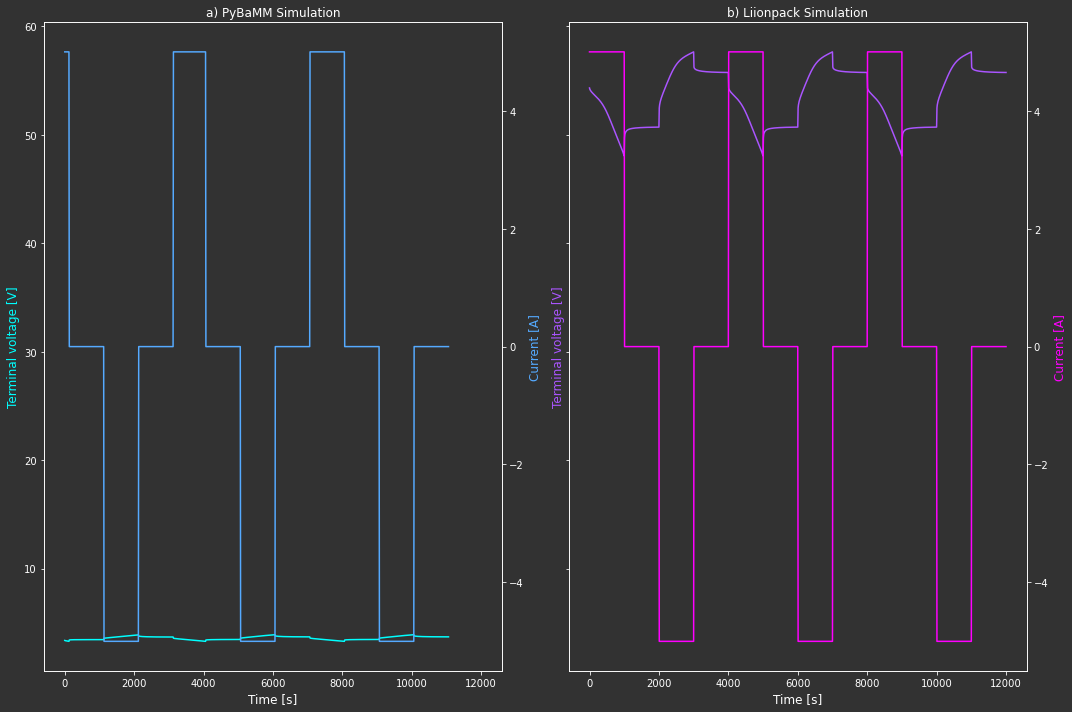

In [24]:
lp.compare_solution_output(sol, output)


## Using Drive Cycles
* **Note! Drive cycles are imported from PyBaMM, so they are prone to change. Thus, make sure you have the latest version of PyBaMM**

### Method 1

In [25]:
# import drive cycle from file locally if not newest version is installed
drive_cycle = pd.read_csv(
    "/Users/eirikbaekkelund/Documents/PyBaMM/pybamm/input/drive_cycles/US06.csv", comment="#", header=None
)
drive_cycle.head()

,0,1
0,0,0.012859
1,1,0.012859
2,2,0.012859
3,3,0.012859
4,4,0.012859


In [26]:
# columnn 1 is time, column 2 is current
drive_cycle_plot = drive_cycle.rename(columns = {0 : "Time", 1 : "Current [A]"})

<AxesSubplot:xlabel='Time', ylabel='Current [A]'>

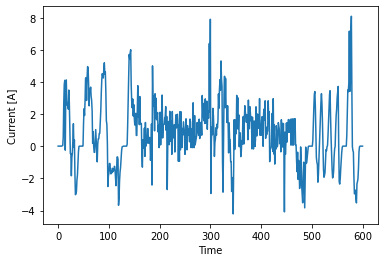

In [27]:
sns.lineplot(data = drive_cycle_plot, x = "Time", y = "Current [A]")

### Method 2

In [28]:
# new feature, syntax may change. See PyBaMM-documentation if not working
drive_cycle.to_numpy()
#experiment = pybamm.Experiment(...)

array([[0.0000e+00, 1.2859e-02],
       [1.0000e+00, 1.2859e-02],
       [2.0000e+00, 1.2859e-02],
       ...,
       [5.9800e+02, 1.2859e-02],
       [5.9900e+02, 1.2859e-02],
       [6.0000e+02, 1.2859e-02]])

In [29]:
# Solve pack
output_d = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    initial_soc=0.75,
)

Stepping simulation: 100%|██████████| 1201/1201 [00:11<00:00, 100.56it/s]


In [30]:
def to_DF_mean(output):
    """
    Turns output of lp.solver into dataframe of mean values
    Input: output of lp.solver(output)
    Returns: DataFrame of solver & its mean values
    """
    output = pd.DataFrame.from_dict(data = output_d, orient = 'index')
    
    for i in range(len(output.columns)):
        output.loc['Cell current [A]', i] = output.loc['Cell current [A]',i].mean()
        output.loc['Cell internal resistance [Ohm]', i] = output.loc['Cell internal resistance [Ohm]',i].mean()
        output.loc['Terminal voltage [V]', i] = output.loc['Terminal voltage [V]',i].mean()
        output.loc['Measured battery open circuit voltage [V]', i] = output.loc['Measured battery open circuit voltage [V]'].mean()
        output.loc['Measured battery open circuit voltage [V]', i] = output.loc['Measured battery open circuit voltage [V]',i].mean()
    
    return output.T

In [31]:
def plot_cell_and_pack(output):
    """
    Plots parameters vs. time for a battery pack and battery cell
    
    Input: lp.solve(output)
    Returns: None
    """
    lp.plot_pack(output)
    lp.plot_cells(output)

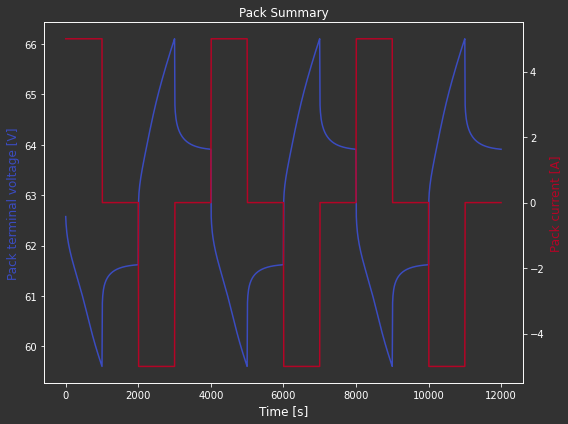

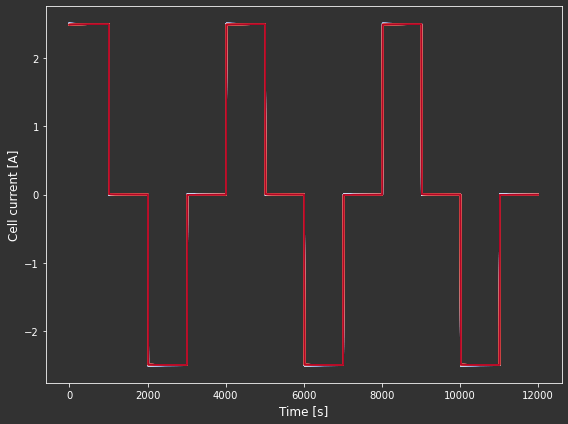

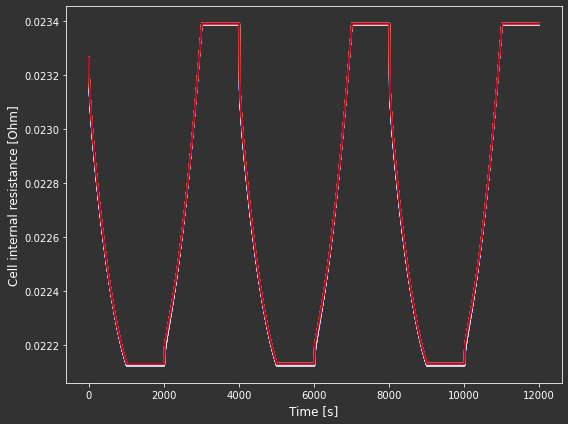

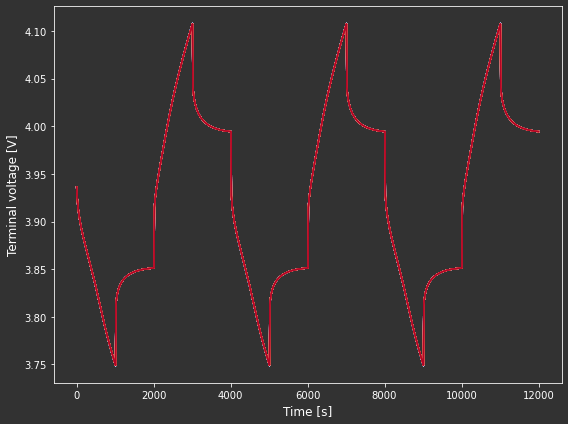

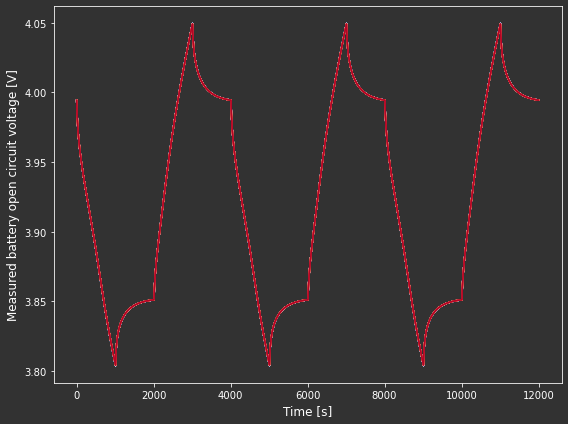

In [32]:
df_pack = to_DF_mean(output_d)
plot_cell_and_pack(output_d)

In [33]:
df_pack.head(10)

,Time [s],Pack current [A],Pack terminal voltage [V],Cell current [A],Cell internal resistance [Ohm],Terminal voltage [V],Measured battery open circuit voltage [V]
0,0.0,5.0,62.575093,2.5,0.023248,3.936183,3.925267
1,10.0,5.0,62.424923,2.5,0.023176,3.926798,3.92521
2,20.0,5.0,62.331277,2.5,0.023141,3.920945,3.92516
3,30.0,5.0,62.260593,2.5,0.023113,3.916527,3.925115
4,40.0,5.0,62.20188,2.5,0.023089,3.912858,3.925074
5,50.0,5.0,62.150565,2.5,0.023067,3.90965,3.925037
6,60.0,5.0,62.104351,2.5,0.023046,3.906762,3.925001
7,70.0,5.0,62.061898,2.5,0.023027,3.904109,3.924969
8,80.0,5.0,62.02236,2.5,0.023008,3.901638,3.924938
9,90.0,5.0,61.985157,2.5,0.022991,3.899312,3.924909


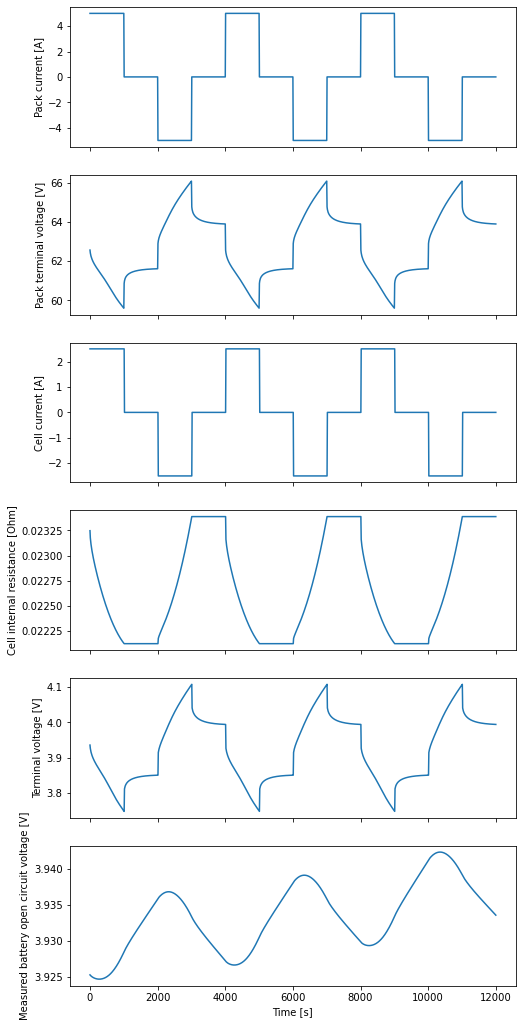

In [34]:
L = list(df_pack.columns)

L.remove("Time [s]")

fig, ax = plt.subplots(len(L), sharex = True)
fig.set_size_inches(8, 18)

for i in range(len(L)):
    ax[i].plot(df_pack["Time [s]"], df_pack[str(L[i])])
    ax[i].set_ylabel(str(L[i]))
    if i == len(L)-1:
        ax[i].set_xlabel("Time [s]")


In [35]:
df_pack.astype(float).describe(percentiles = [0.25, .50, .75])

,Time [s],Pack current [A],Pack terminal voltage [V],Cell current [A],Cell internal resistance [Ohm],Terminal voltage [V],Measured battery open circuit voltage [V]
count,1201.000000,1201.000000,1201.000000,1.201000e+03,1201.000000,1201.000000,1201.000000
mean,6000.000000,0.004163,62.804711,4.163198e-03,0.022681,3.925283,3.933536
std,3468.431442,3.538477,1.755676,1.770706e+00,0.000509,0.096906,0.004706
min,0.000000,-5.000000,59.598687,-2.500000e+00,0.022127,3.748807,3.924672
25%,3000.000000,0.000000,61.469359,2.282484e-10,0.022127,3.845730,3.929766
50%,6000.000000,0.000000,62.575093,4.398752e-10,0.022550,3.920461,3.933853
75%,9000.000000,5.000000,64.108604,2.500000e+00,0.023388,4.002849,3.936849
max,12000.000000,5.000000,66.106454,2.500000e+00,0.023388,4.107744,3.942373


In [36]:
mean_current = drive_cycle.iloc[:,1].mean()
mean_current

0.8404807891846918

In [37]:
experiment = pybamm.Experiment(
    operating_conditions=["Discharge at 0.84 A for 1200 s"] * 3, period="1 second"
)

In [38]:
# Solve pack
output_m = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    initial_soc=0.75,
)

Stepping simulation: 100%|██████████| 3601/3601 [00:36<00:00, 100.01it/s]


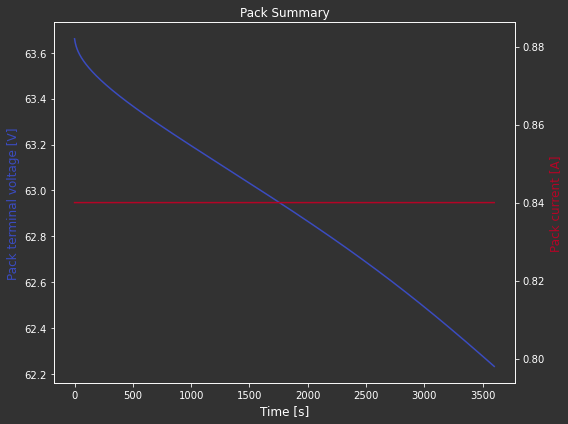

In [39]:
lp.plot_pack(output_m)

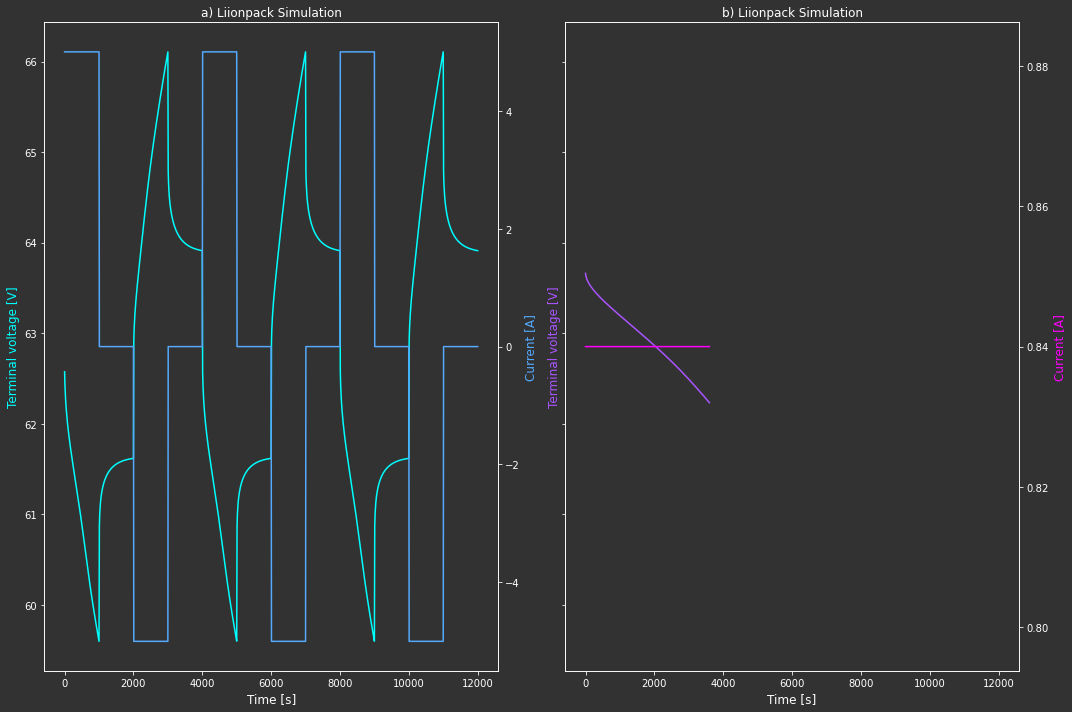

In [40]:
lp.compare_solution_output(output_d, output_m)

In [41]:
print(drive_cycle)
experiment = pybamm.Experiment(
    operating_conditions=["Run US06 (A)"],
    drive_cycles={"US06": drive_cycle},
    period="1 minute",
)

       0         1
0      0  0.012859
1      1  0.012859
2      2  0.012859
3      3  0.012859
4      4  0.012859
..   ...       ...
596  596  0.012859
597  597  0.012859
598  598  0.012859
599  599  0.012859
600  600  0.012859

[601 rows x 2 columns]


InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# Solve pack
output_t = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    initial_soc=0.75,
)

Stepping simulation: 100%|██████████| 3601/3601 [00:37<00:00, 95.45it/s]


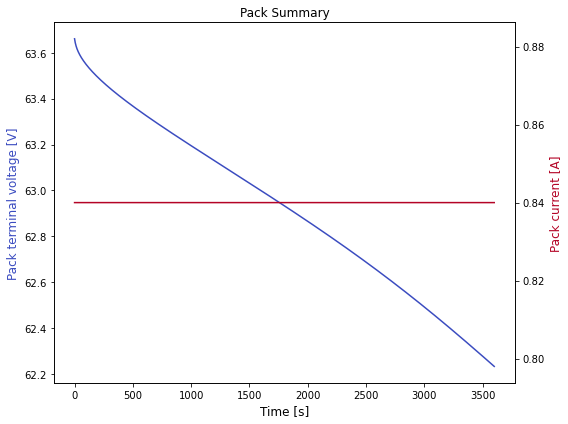

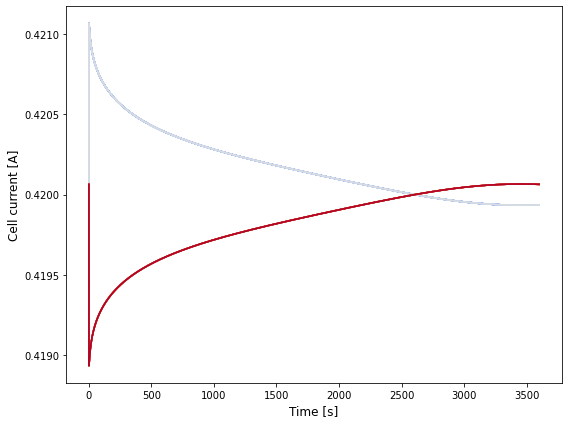

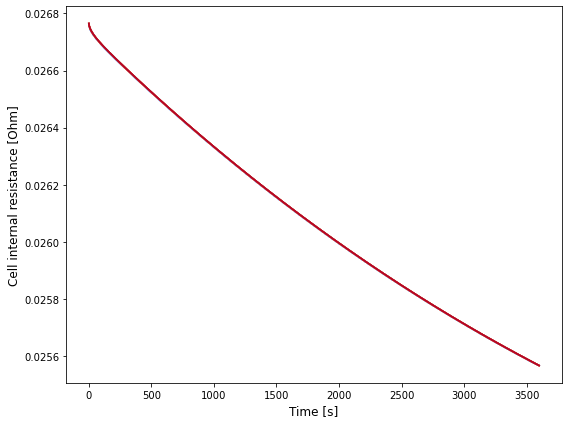

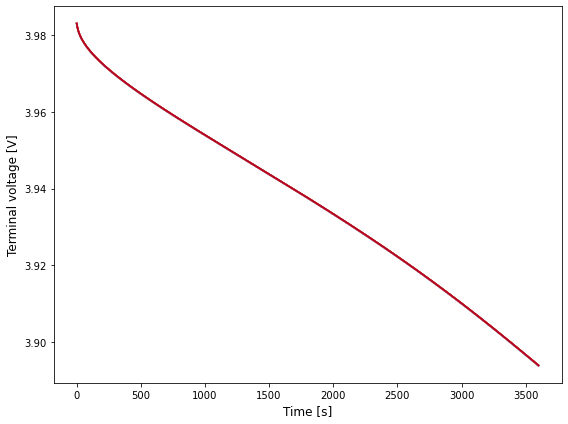

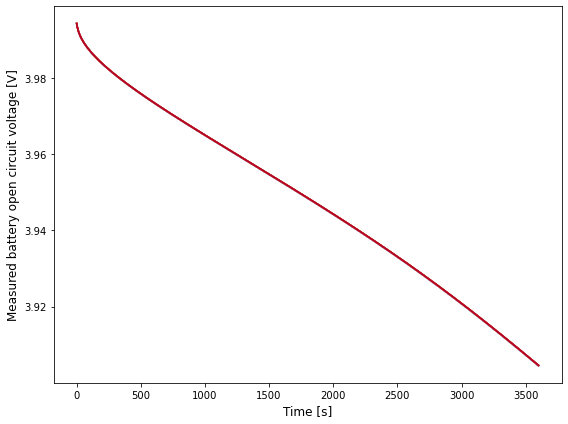

In [ ]:
lp.plot_output(output_t)

## Changing our Model

In [ ]:
import inspect

lines = inspect.getsource(lp.basic_simulation)
print(lines)

def basic_simulation(parameter_values=None):
    """
    Create a Basic PyBaMM simulation set up for integration with liionpack

    Args:
        parameter_values (pybamm.ParameterValues):
            The default is None.

    Returns:
        pybamm.Simulation:
            A simulation that can be solved individually or passed into the
            liionpack solve method

    """
    # Create the pybamm model
    model = pybamm.lithium_ion.SPM()

    # Add events to the model
    model = lp.add_events_to_model(model)

    # Set up parameter values
    if parameter_values is None:
        chemistry = pybamm.parameter_sets.Chen2020
        param = pybamm.ParameterValues(chemistry=chemistry)
    else:
        param = parameter_values.copy()

    # Set up solver and simulation
    solver = pybamm.CasadiSolver(mode="safe")
    sim = pybamm.Simulation(
        model=model,
        parameter_values=param,
        solver=solver,
    )
    return sim



## Key Features
* Tune parameters using PyBaMM's feature that creates csv files to specifically input parameters into .csv files for all variables within the battery
1. Use a default package for parameters before initializing. Use the following tutorial for how to create csv files with user-defined parameters:<br> https://www.youtube.com/watch?v=oUhOL8ebOFw&t=426s&ab_channel=PyBaMM 
2. This can be passed into our liionpack solver to run the solver for our model

Single cell model simulation work as followed:

In [ ]:
sim = lp.basic_simulation()
sim.solve([0, 3600])
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3567.8551657209678, step=35.67855165720968),…

In [ ]:
print(parameter_values)
parameter_values.update({"Negative particle radius [m]": "[input]"})
NP_radi = np.array([1.0 for i in range(Np*Ns)]) * 6e-06
inputs = {"Negative particle radius [m]" : NP_radi}


output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    sim_func=lp.basic_simulation,
    output_variables=["Volume-averaged cell temperature [K]"],
    inputs = inputs,
)

{'1 + dlnf/dlnc': 1.0,
 'Ambient temperature [K]': 298.15,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell volume [m3]': 2.42e-05,
 'Current function [A]': InputParameter(0x4657c791b3617018, Current function [A], children=[], domains={}),
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x7f7c8c3c5430>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x7f7c8c3c54c0>,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 22846.724804062138,
 'Initial concentration in positive electrode [mol.m-3]': 25959.742551227868,
 'Initial inner SEI thickness [m]': 2.5e-09,
 'Initial outer SEI thickness [m]': 2.5e-09,
 'I

Stepping simulation: 100%|██████████| 3601/3601 [00:39<00:00, 92.09it/s]


In [ ]:
output

{'Time [s]': array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.598e+03, 3.599e+03,
        3.600e+03]),
 'Pack current [A]': array([0.84, 0.84, 0.84, ..., 0.84, 0.84, 0.84]),
 'Pack terminal voltage [V]': array([63.65730871, 63.65391823, 63.650772  , ..., 62.22964247,
        62.22919407, 62.22874563]),
 'Cell current [A]': array([[0.41993615, 0.41993615, 0.41993615, ..., 0.42006385, 0.42006385,
         0.42006385],
        [0.42105144, 0.42105144, 0.42105144, ..., 0.41894856, 0.41894856,
         0.41894856],
        [0.42104726, 0.42104726, 0.42104726, ..., 0.41895274, 0.41895274,
         0.41895274],
        ...,
        [0.41993711, 0.41993711, 0.41993711, ..., 0.42006289, 0.42006289,
         0.42006289],
        [0.41993714, 0.41993714, 0.41993714, ..., 0.42006286, 0.42006286,
         0.42006286],
        [0.41993717, 0.41993717, 0.41993717, ..., 0.42006283, 0.42006283,
         0.42006283]]),
 'Cell internal resistance [Ohm]': array([[0.02733467, 0.02733467, 0.02733467, ..., 0.0

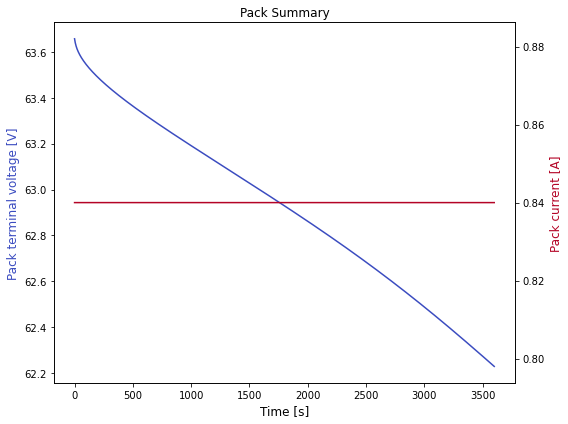

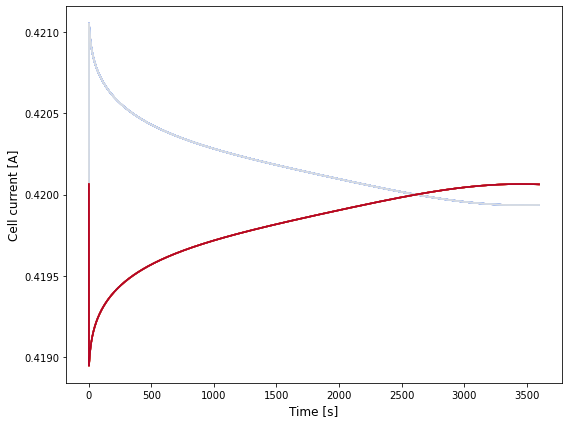

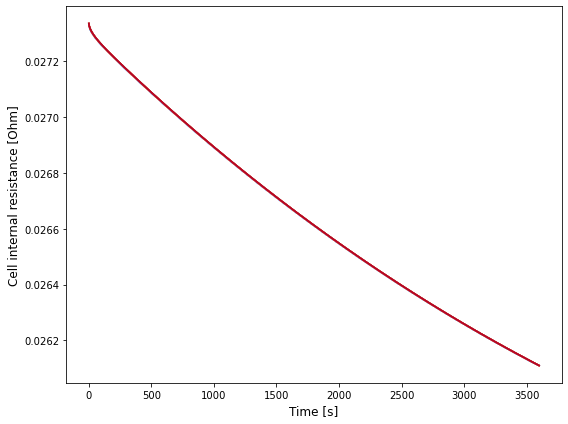

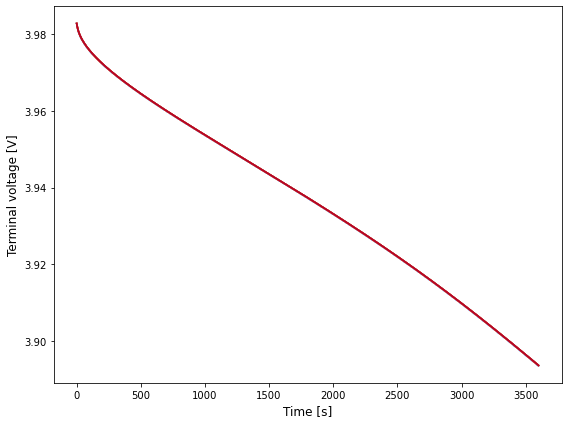

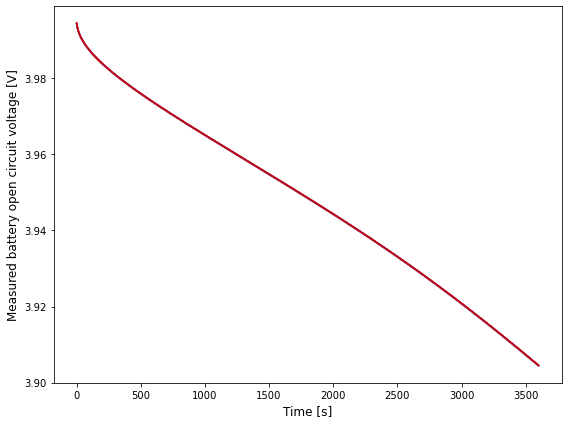

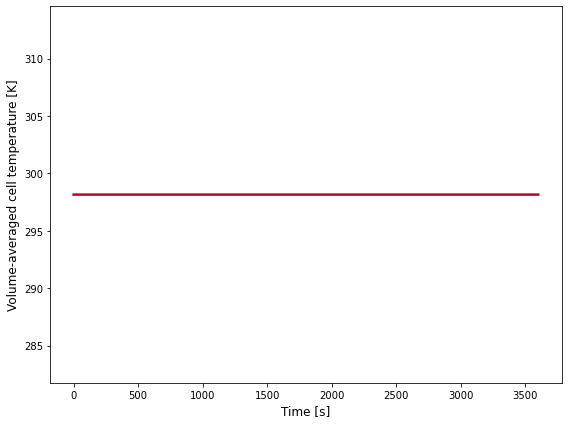

In [ ]:
lp.plot_output(output)

## Aging of Cells - Battery Pack

In [ ]:
experiment = pybamm.Experiment(
    ["Charge at 15 A for 10 minutes", "Rest for 10 minutes", "Discharge at 15 A for 10 minutes", "Rest for 10 minutes"]*100,
    period="30 seconds",)


In [ ]:
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)
parameter_values.search(" ")

1 + dlnf/dlnc	1.0
Ambient temperature [K]	298.15
Bulk solvent concentration [mol.m-3]	2636.0
Cation transference number	0.2594
Cell cooling surface area [m2]	0.00531
Cell volume [m3]	2.42e-05
Current function [A]	5.0
EC diffusivity [m2.s-1]	2e-18
EC initial concentration in electrolyte [mol.m-3]	4541.0
Electrode height [m]	0.065
Electrode width [m]	1.58
Electrolyte conductivity [S.m-1]	<function electrolyte_conductivity_Nyman2008 at 0x7f7c8c3c5430>
Electrolyte diffusivity [m2.s-1]	<function electrolyte_diffusivity_Nyman2008 at 0x7f7c8c3c54c0>
Initial concentration in electrolyte [mol.m-3]	1000.0
Initial concentration in negative electrode [mol.m-3]	29866.0
Initial concentration in positive electrode [mol.m-3]	17038.0
Initial inner SEI thickness [m]	2.5e-09
Initial outer SEI thickness [m]	2.5e-09
Initial temperature [K]	298.15
Inner SEI electron conductivity [S.m-1]	8.95e-14
Inner SEI lithium interstitial diffusivity [m2.s-1]	1e-20
Inner SEI open-circuit potential [V]	0.1
Inner SEI part

#### Important Note
* "chemistry" can be altered (it is a dict). We can use a personalized csv file the keys can be linked to the parameters as we want by calling the path to our csv-file
* Currently there is a dimension-error when trying to pass inputs for the lp.solve() function

In [ ]:
def SEI_degradation(parameter_values = None):
    """
    Create a PyBaMM simulation set up for integration with liionpack

    Args:
        parameter_values (pybamm.ParameterValues):
            The default is None.

    Returns:
        pybamm.Simulation:
            A simulation that can be solved individually or passed into the
            liionpack solve method
    """
    # Create the pybamm model
    model = pybamm.lithium_ion.SPMe(
        options={
            "SEI": "ec reaction limited",
            "SEI film resistance": "distributed",
            "SEI porosity change": "true",
        }
    )

    # Add events to the model
    model = lp.add_events_to_model(model)

    # Set up parameter values
    if parameter_values is None:
        chemistry = pybamm.parameter_sets.Chen2020
        parameter_values = pybamm.ParameterValues(chemistry=chemistry)

    # Set up solver and simulation
    solver = pybamm.CasadiSolver(mode="safe")
    sim = pybamm.Simulation(
        model=model,
        parameter_values=parameter_values,
        solver=solver,
    )

    return sim

In [ ]:
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    sim_func=SEI_degradation,
    output_variables=output_variables,
    initial_soc=0.5,
)

Stepping simulation:   0%|          | 8/8001 [00:01<15:30,  8.59it/s]2022-03-30 17:14:47,340 - [WARNING] solvers.log_event(500): Event: Maximum voltage, Batteries: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
2022-03-30 17:14:47 - [WARNING] solvers.log_event(500): Event: Maximum voltage, Batteries: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Stepping simulation:   0%|          | 9/8001 [00:01<15:24,  8.65it/s]2022-03-30 17:14:47,345 - [WARNING] solvers.solve(249): High voltage limit reached
2022-03-30 17:14:47 - [WARNING] solvers.solve(249): High voltage limit reached
Stepping simulation:   0%|          | 9/8001 [00:01<18:18,  7.27it/s]


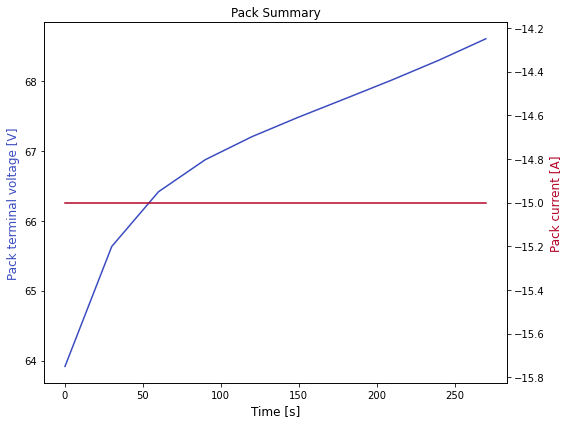

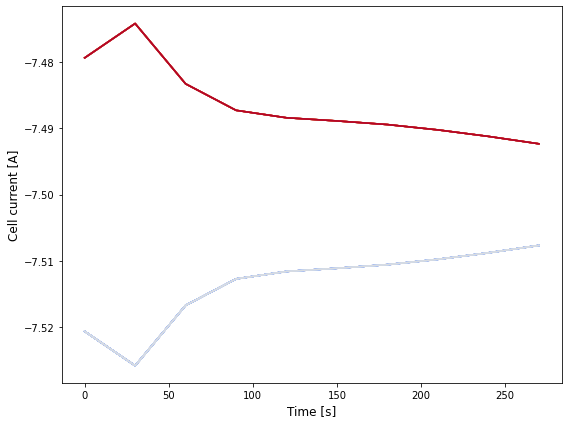

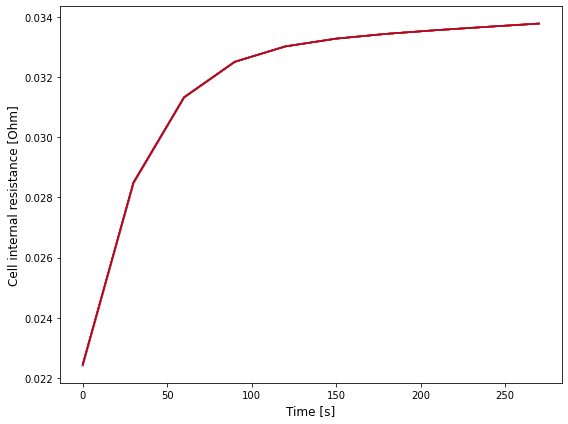

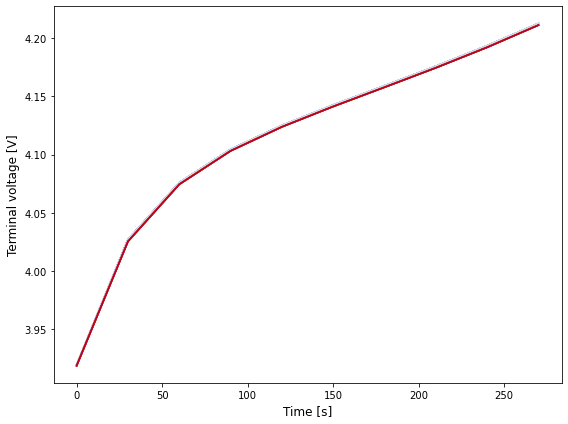

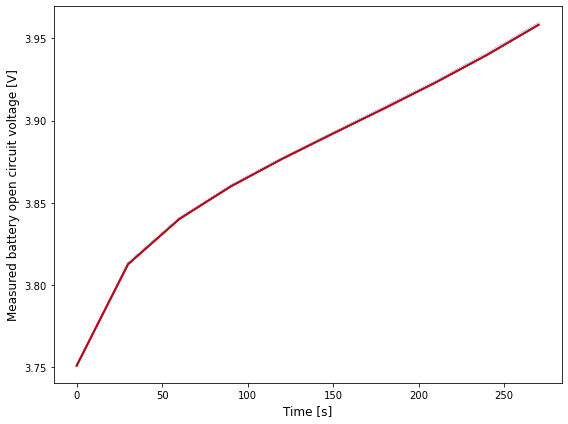

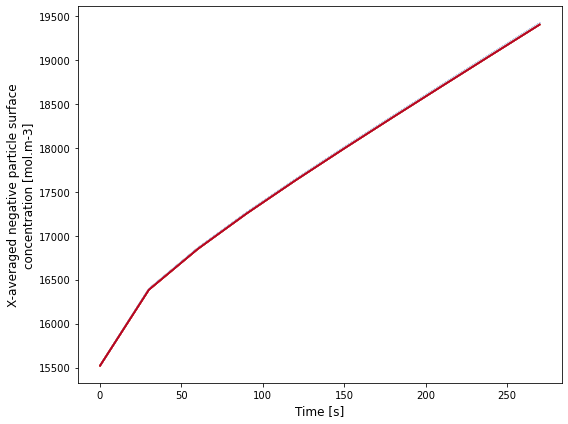

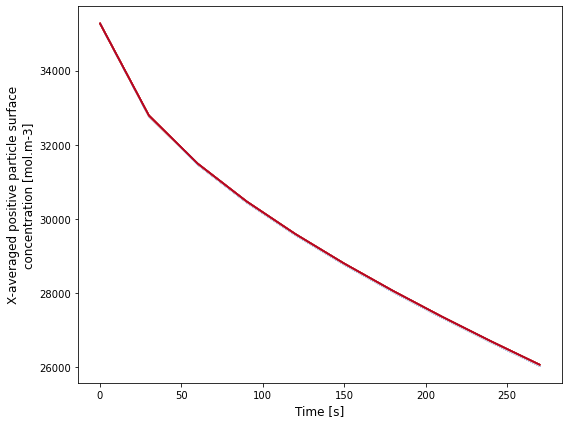

In [ ]:
lp.plot_output(output)


In [ ]:
parameter_values.update({"EC initial concentration in electrolyte [mol.m-3]": "[input]"})
EC_conc=np.array([1 for i in range(Np*Ns)])* random.randrange(2000,3000)
inputs = {"EC initial concentration in electrolyte [mol.m-3]": EC_conc}

In [ ]:
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    sim_func=SEI_degradation,
    inputs=inputs,
    output_variables=output_variables,
    initial_soc=0.5
)

Stepping simulation:   0%|          | 8/8001 [00:01<15:48,  8.42it/s]2022-03-30 17:29:12,953 - [WARNING] solvers.log_event(500): Event: Maximum voltage, Batteries: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
2022-03-30 17:29:12 - [WARNING] solvers.log_event(500): Event: Maximum voltage, Batteries: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Stepping simulation:   0%|          | 9/8001 [00:01<16:02,  8.30it/s]2022-03-30 17:29:12,959 - [WARNING] solvers.solve(249): High voltage limit reached
2022-03-30 17:29:12 - [WARNING] solvers.solve(249): High voltage limit reached
Stepping simulation:   0%|          | 9/8001 [00:01<18:20,  7.26it/s]


## Electrode State of Health Estimation

In [60]:
parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values.update({"Nominal cell capacity [A.h]": 57,
                        "Typical current [A]": 57,
                        "Current function [A]": 57,
                        "Number of cells connected in series to make a battery": 16,
                        "Number of electrodes connected in parallel to make a cell": 2})

SPMe = pybamm.lithium_ion.SPMe()
param = SPMe.param

Vmin = 1.2 
Vmax = 5.0 

neg_conc = parameter_values.evaluate(param.C_n_init)
pos_conc = parameter_values.evaluate(param.C_p_init)

Li_init = parameter_values.evaluate(param.n_Li_particles_init)

sol = sim.solve(t_eval=[0,3600],
                inputs = {"V_min": Vmin, "V_max": Vmax, "C_n": neg_conc, 
                          "C_p": pos_conc, "n_Li": Li_init,
                          "dt_max": 1e-1000})

print(f"Initial negative electrode SOC: {sol['x_100'].data[0]:.3f}")
print(f"Initial positive electrode SOC: {sol['y_100'].data[0]:.3f}")

c_n_max = parameter_values.evaluate(param.c_n_max) 
c_p_max = parameter_values.evaluate(param.c_p_max) 

parameter_values.update({
        "Initial concentration in negative electrode [mol.m-3]": sol["x_100"].data[0] * c_n_max,
        "Initial concentration in positive electrode [mol.m-3]": sol["y_100"].data[0] * c_p_max,
})






2022-04-06 16:26:27,537 - [WARNING] simulation.solve(808): Ignoring t_eval as solution times are specified by the experiment
2022-04-06 16:26:27 - [WARNING] simulation.solve(808): Ignoring t_eval as solution times are specified by the experiment


SolverError: Maximum number of decreased steps occurred at t=0.0. Try solving the model up to this time only or reducing dt_max (currently, dt_max=3.5458164923888056).

In [ ]:
model = pybamm.lithium_ion.ElectrodeSOH()
sim = pybamm.Simulation(model = model, )

## Adding Variables For Simulation

In [ ]:
import battery_variables

In [ ]:
x = battery_variables.add_variable(pybamm.BaseBatteryModel(), "x", {"x" : 1, "y" : 2, "z" : 3}, 1, 10, 100)

KeyError: Variable(0x58671ef8c07a74f4, x, children=[], domains={})